<a href="https://colab.research.google.com/github/harry-zhao78/colab/blob/master/keran's_trade_stement_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyfolio
import pyfolio as pf
import matplotlib.pyplot as plt
import empyrical
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files



     |████████████████████████████████| 92kB 2.3MB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=c8ac7574d2ee127363b12a560b9ee95e9d2f12e63f977b756d69e311ef6cd5ae
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=9e38bf9ac2a4d3238df939141b4f78f6137dc406ee2c52023d50e49fa22fdd3a
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [ ]:
uploaded = files.upload()

Saving trading statement.csv to trading statement.csv


In [ ]:

df1 = pd.read_csv("trading statement.csv",parse_dates=True)
#df1 = pd.read_csv("test.csv")

df2=df1
df2

,Transaction Date,Stock Code,Name of Stock,Type of Transaction,Transaction Price,Volume of Trade,Number of Shares in Account,Transaction Amount,Comission fee + Transcation Amount,Remaining Cash in Account
0,20160112,600528,中铁二局,Buy,14.11,400,400,5644.0,-5649.11,13560.66
1,20160112,601198,东兴证券,Buy,27.39,200,200,5478.0,-5483.11,8077.55
2,20160112,600528,中铁二局,Buy,14.01,500,900,7005.0,-7010.14,1067.41
3,20160122,600528,中铁二局,Sell,15.07,500,400,7535.0,7522.31,8589.72
4,20160122,601198,东兴证券,Sell,24.12,200,0,4824.0,4814.08,13403.80
...,...,...,...,...,...,...,...,...,...,...
169,20200409,600335,国机汽车,Sell,5.55,500,0,2775.0,2767.17,43029.81
170,20200413,600683,京投发展,Buy,4.19,1000,1000,4190.0,-4195.08,38834.73
171,20200413,2444,巨星科技,Buy,10.56,2000,2000,21120.0,-21126.34,17708.39
172,20200424,600683,京投发展,Sell,3.87,1000,0,3870.0,3861.05,21569.44


In [ ]:
df2[(df2["Type of Transaction"]!="Buy") & ( df2["Type of Transaction"]!="Sell")]
a=df2.drop(index=109)
a.index
b=a.reset_index()
df=b.drop(columns="index")

In [ ]:
stock_list=df[" Name of Stock"].unique()

#df["buy port"] = [{} for _ in range(len(df))]
df["port_value"] = ""
df["account_value"] = ""

a={}
port_value=0
for index, row in df.iterrows():
  
  a[row[" Name of Stock"]]=[row["Number of Shares in Account"],row["Transaction Price"]]
  print(row["Transaction Date"],a)
  port_value=0
  for key, value in a.items():
    
    port_value=port_value+value[0]*value[1]
   # print(value[0],value[1])
    #print(port_value)    

  account_value=row["Remaining Cash in Account "]+port_value

  df.loc[index,"port_value"]=port_value
  df.loc[index,"account_value"]=account_value


#df1=df.set_index("Transaction Date")
#df2=df1[["port_value","account_value"]]



#for index, row in df.iterrows():
  #df[index,"perc_returns"]=df[index,"perc_returns"]-df[index-1,"perc_returns"]

df["perc_returns"]=df.account_value.pct_change()
df2=df[["Transaction Date","port_value","account_value","perc_returns"]]


df2=df2.drop(index=0)
#df2["Transaction Date"]=df2["Transaction Date"].apply(lambda x: pd.to_datetime( str(x), format='%Y%m%d', errors='ignore'))
df2["Transaction Date"]=df2["Transaction Date"].apply(lambda x: pd.Series(pd.date_range(str(x), periods=2)))

df2=df2.set_index("Transaction Date")
#df2.tail(60)


20160112 {'中铁二局': [400, 14.11]}
20160112 {'中铁二局': [400, 14.11], '东兴证券': [200, 27.39]}
20160112 {'中铁二局': [900, 14.01], '东兴证券': [200, 27.39]}
20160122 {'中铁二局': [400, 15.07], '东兴证券': [200, 27.39]}
20160122 {'中铁二局': [400, 15.07], '东兴证券': [0, 24.12]}
20160125 {'中铁二局': [200, 14.75], '东兴证券': [0, 24.12]}
20160127 {'中铁二局': [100, 14.58], '东兴证券': [0, 24.12]}
20160128 {'中铁二局': [300, 13.99], '东兴证券': [0, 24.12]}
20160128 {'中铁二局': [800, 14.0], '东兴证券': [0, 24.12]}
20160128 {'中铁二局': [1300, 13.86], '东兴证券': [0, 24.12]}
20160217 {'中铁二局': [1000, 14.38], '东兴证券': [0, 24.12]}
20160217 {'中铁二局': [800, 14.33], '东兴证券': [0, 24.12]}
20160217 {'中铁二局': [600, 14.5], '东兴证券': [0, 24.12]}
20160218 {'中铁二局': [300, 14.29], '东兴证券': [0, 24.12]}
20160218 {'中铁二局': [100, 14.4], '东兴证券': [0, 24.12]}
20160225 {'中铁二局': [300, 13.58], '东兴证券': [0, 24.12]}
20160229 {'中铁二局': [500, 12.44], '东兴证券': [0, 24.12]}
20160302 {'中铁二局': [300, 13.04], '东兴证券': [0, 24.12]}
20160303 {'中铁二局': [100, 13.78], '东兴证券': [0, 24.12]}
20160311 {'中铁二局': [300, 12.

In [ ]:
bt_returns=df2.perc_returns
bt_returns

Transaction Date
2016-01-12   -0.000266
2016-01-12   -0.002351
2016-01-22    0.049143
2016-01-22   -0.033038
2016-01-25   -0.006999
                ...   
2020-04-09    0.000632
2020-04-13   -0.000118
2020-04-13   -0.000147
2020-04-24   -0.007647
2020-04-24   -0.041350
Name: perc_returns, Length: 172, dtype: float64

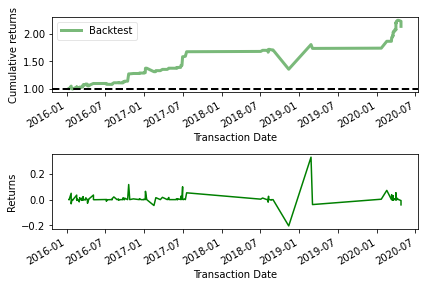

In [ ]:
# Cumulative Returns
#fig = plt.figure(1)

plt.subplot(2,1,1)
pf.plotting.plot_rolling_returns(bt_returns)

# Daily, Non-Cumulative Returns
plt.subplot(2,1,2)
pf.plotting.plot_returns(bt_returns)
plt.tight_layout()
#fig.set_size_inches(35,20)


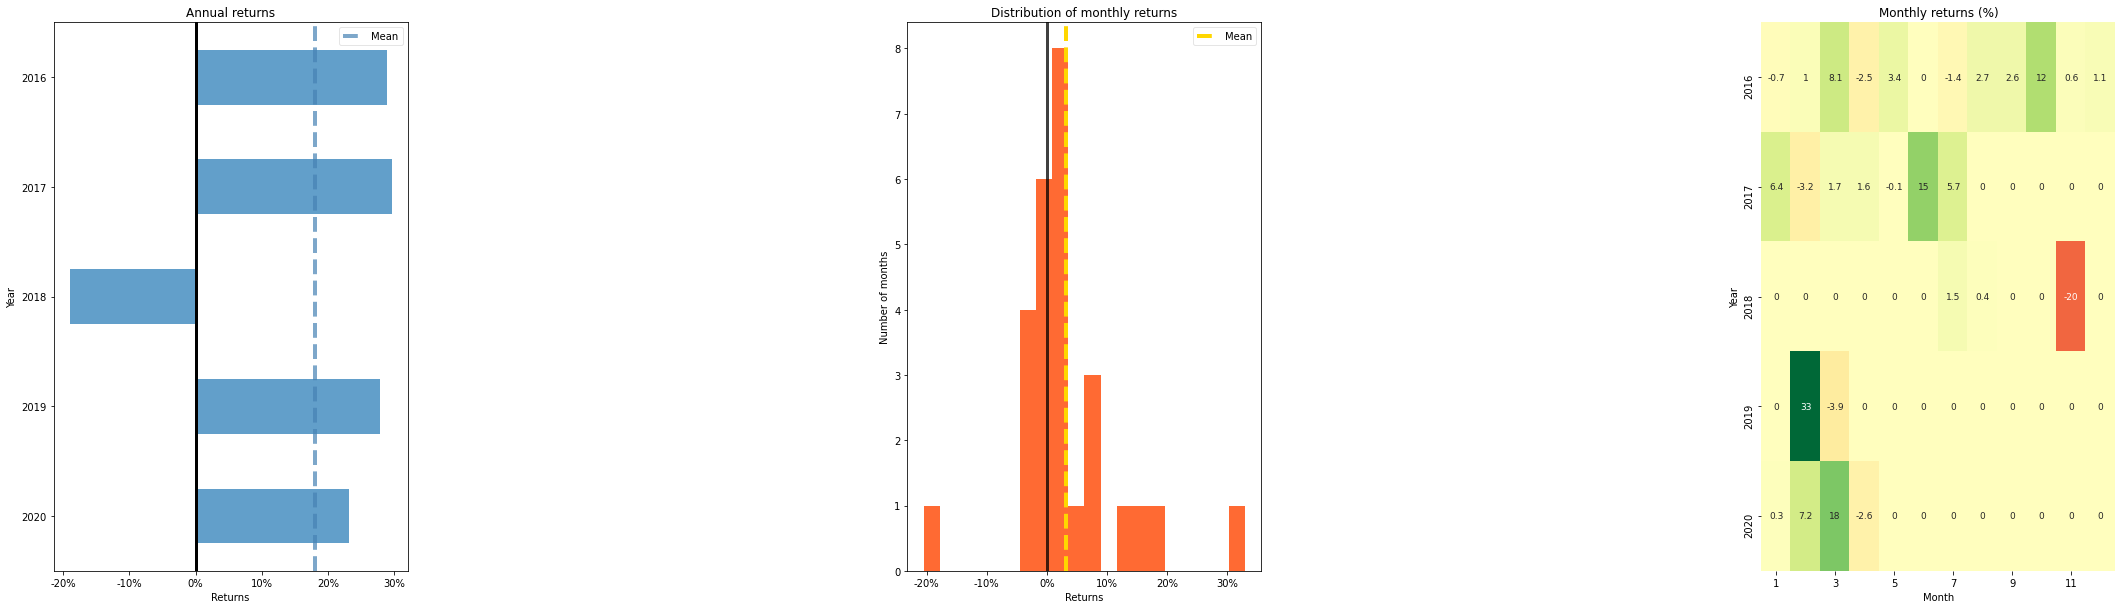

In [ ]:
fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(35,10)

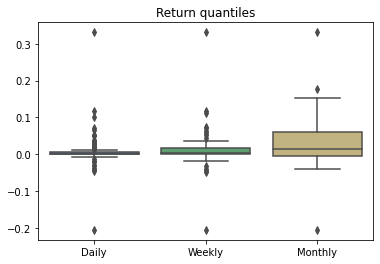

In [ ]:
pf.plot_return_quantiles(bt_returns);


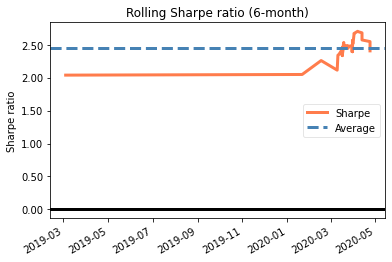

In [ ]:
pf.plot_rolling_sharpe(bt_returns);

In [ ]:
bt_returns.index

DatetimeIndex(['2016-01-12', '2016-01-12', '2016-01-22', '2016-01-22',
               '2016-01-25', '2016-01-27', '2016-01-28', '2016-01-28',
               '2016-01-28', '2016-02-17',
               ...
               '2020-04-01', '2020-04-02', '2020-04-02', '2020-04-02',
               '2020-04-07', '2020-04-09', '2020-04-13', '2020-04-13',
               '2020-04-24', '2020-04-24'],
              dtype='datetime64[ns]', name='Transaction Date', length=172, freq=None)

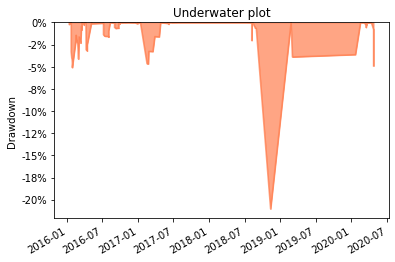

In [ ]:
pf.plot_drawdown_underwater(bt_returns);


In [ ]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=4bc2a168e0aa0582ee524e96d8a13368ceb07ed81d813607698b4f4405c846ac
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [ ]:
import yfinance as yf
data = yf.download("600528.SS", start="2017-01-01", end="2017-04-30")
data["Close"]
a=yf.download("600683.SS", start="2017-01-01", end="2017-04-30")
a["Close"]
b=pd.concat([data.Close, a.Close],axis=1)
b
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY AAPL MSFT",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  3 of 3 completed


SPY                  ...    AAPL               
                             Open    High     Low  ...     Low   Close Volume
Datetime                                           ...                       
2020-07-17 04:00:00-04:00     NaN     NaN     NaN  ...  385.15  385.15    0.0
2020-07-17 04:01:00-04:00     NaN     NaN     NaN  ...  385.02  385.02    0.0
2020-07-17 04:06:00-04:00     NaN     NaN     NaN  ...     NaN     NaN    NaN
2020-07-17 04:11:00-04:00     NaN     NaN     NaN  ...     NaN     NaN    NaN
2020-07-17 04:15:00-04:00  319.66  319.67  319.60  ...     NaN     NaN    NaN
...                           ...     ...     ...  ...     ...     ...    ...
2020-07-17 16:45:00-04:00  321.50  321.51  321.30  ...  384.97  384.97    0.0
2020-07-17 16:46:00-04:00  321.51  321.58  321.46  ...  384.99  385.00    0.0
2020-07-17 16:47:00-04:00  321.52  321.63  321.52  ...  385.00  385.00    0.0
2020-07-17 16:48:00-04:00  321.64  321.70  321.64  ...  384.95  384.95    0.0
2020-07-17 16:49:00-04:00  321.68  321.68  321.59  ...     NaN     NaN    NaN

[677 rows x 15 columns]